In [1]:
%pip install -r requirements.txt

  Using cached pandas-2.2.3-cp312-cp312-macosx_11_0_arm64.whl.metadata (89 kB)
  Using cached matplotlib-3.10.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached numpy-2.2.3-cp312-cp312-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pytz-2025.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.56.0-cp312-cp312-macosx_10_13_universal2.whl.metadata (101 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.2 kB)
  Using cached pillow-11.1.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
Using cached pandas-2.2.3-cp312-cp312-macosx_11_0_arm64.whl (11.4 MB)
Using cached matplotlib

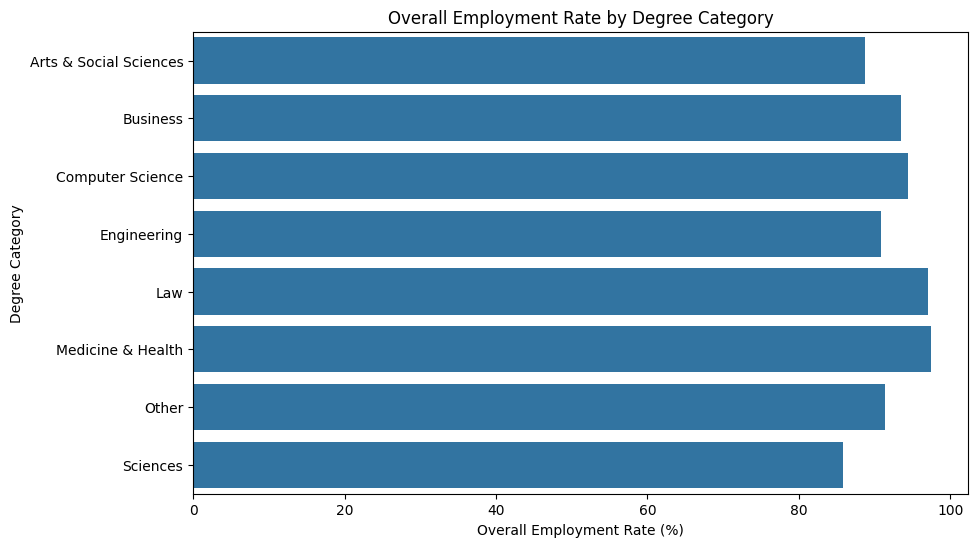

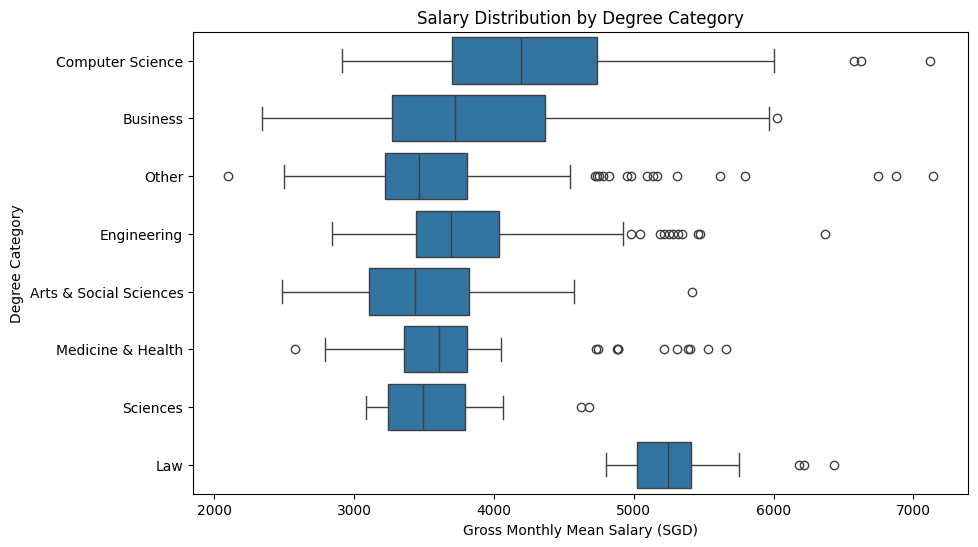

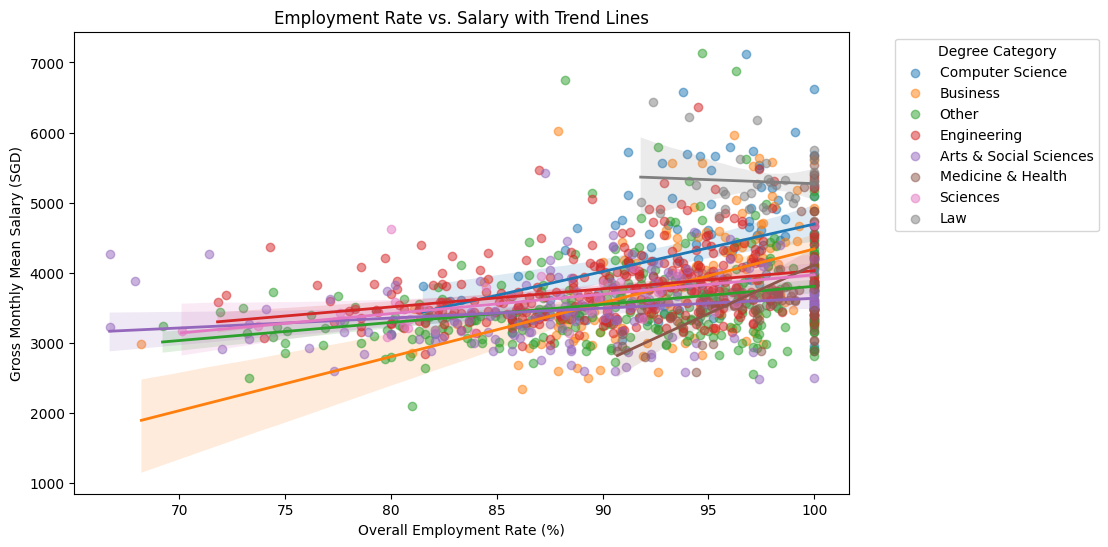

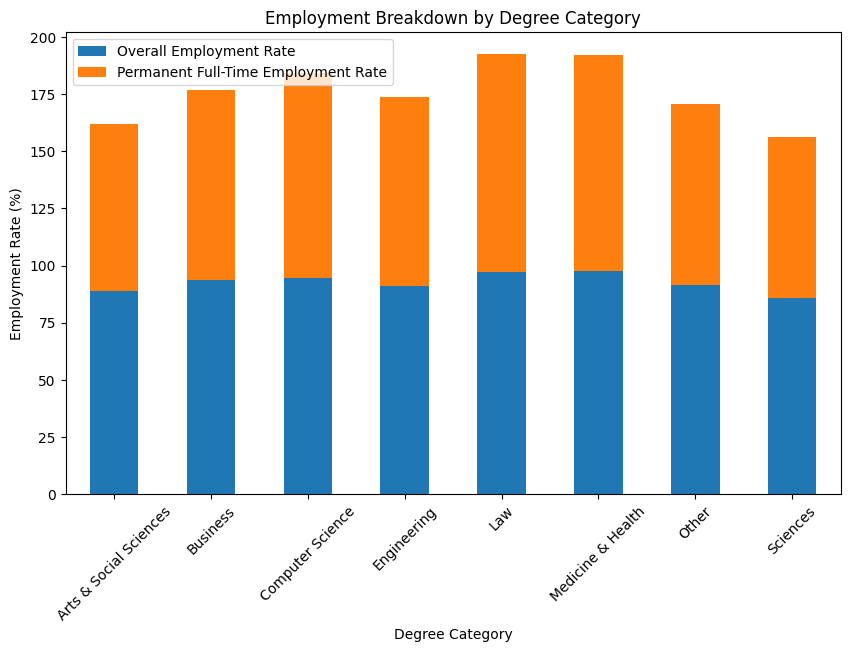

In [3]:
# Group similar degrees together
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load the data
file_path = "GraduateEmploymentData.csv"
df = pd.read_csv(file_path)

# Ensure numeric columns are properly converted
df['(OER) Overall Employment Rate'] = pd.to_numeric(df['(OER) Overall Employment Rate'], errors='coerce')
df['(GMM) Gross Monthly Mean'] = pd.to_numeric(df['(GMM) Gross Monthly Mean'], errors='coerce')
df['(PFTER) Permanent Full Time Employment Rate'] = pd.to_numeric(df['(PFTER) Permanent Full Time Employment Rate'], errors='coerce')

# Function to categorize degrees
def categorize_degree(degree):
    keywords = {
        "Computer Science": ["Computer Science", "Computing", "Information Systems", "Information Technology"],
        "Engineering": ["Engineering", "Electrical", "Mechanical", "Civil", "Aerospace"],
        "Business": ["Business", "Finance", "Accounting", "Management"],
        "Sciences": ["Biology", "Physics", "Mathematics", "Chemistry"],
        "Arts & Social Sciences": ["Arts", "Social Sciences", "Psychology", "Political Science"],
        "Medicine & Health": ["Medicine", "Nursing", "Pharmacy", "Health"],
        "Law": ["Law", "Legal"],
    }
    for category, words in keywords.items():
        if any(word in degree for word in words):
            return category
    return "Other"

# Apply categorization
df['degree_category'] = df['degree'].astype(str).apply(categorize_degree)

degree_grouped = df.groupby('degree_category', as_index=False).mean(numeric_only=True)

# 1. Bar Chart – Employment rates by degree type
plt.figure(figsize=(10, 6))
sns.barplot(x='(OER) Overall Employment Rate', y='degree_category', data=degree_grouped, errorbar=None)
plt.xlabel("Overall Employment Rate (%)")
plt.ylabel("Degree Category")
plt.title("Overall Employment Rate by Degree Category")
plt.show()

# 2. Box Plot – Salary distribution by degree type
plt.figure(figsize=(10, 6))
sns.boxplot(x='(GMM) Gross Monthly Mean', y='degree_category', data=df)
plt.xlabel("Gross Monthly Mean Salary (SGD)")
plt.ylabel("Degree Category")
plt.title("Salary Distribution by Degree Category")
plt.show()

# 3. Scatter Plot with Trend Lines – Employment rate vs. salary
plt.figure(figsize=(10, 6))
for category in df['degree_category'].unique():
    subset = df[df['degree_category'] == category]
    sns.regplot(x='(OER) Overall Employment Rate', y='(GMM) Gross Monthly Mean', data=subset, label=category, scatter_kws={'alpha':0.5}, line_kws={'linewidth':2})
plt.xlabel("Overall Employment Rate (%)")
plt.ylabel("Gross Monthly Mean Salary (SGD)")
plt.title("Employment Rate vs. Salary with Trend Lines")
plt.legend(title="Degree Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 4. Stacked Bar Chart – Employment breakdown by degree type
df_grouped = df.groupby('degree_category')[['(OER) Overall Employment Rate', '(PFTER) Permanent Full Time Employment Rate']].mean()
df_grouped.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel("Degree Category")
plt.ylabel("Employment Rate (%)")
plt.title("Employment Breakdown by Degree Category")
plt.legend(["Overall Employment Rate", "Permanent Full-Time Employment Rate"])
plt.xticks(rotation=45)
plt.show()
